### Project - Text Classification


- This file may need 5-6 minutes ( tested on intel core i7 processor) to finish running. So you should run it first and read the code later to save your time. The reason why it will take a lot of time to finish running is that it has a lot of computaion to do to create a 2D matrix suitable for text classification and a lot of feature to iterate through

- It will take majority of time for naive bayes classifier, don't make any changes in code before letting it run for once.


# Importing Important Libraries

- I have imported the stopwords from nltk and copied more of them from internet.
- Instead of split() function, I am using the tokenizer which makes the job much easier.
- Instead of manually downloading the data from the internet, I have downloaded it using sklearn.datasets.fetch_20newsgroups


In [1]:
from sklearn.datasets import fetch_20newsgroups
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.naive_bayes import MultinomialNB

In [2]:
newsgroups = fetch_20newsgroups()
# Instead of the link, I have fetched the data through sklearn itself just to reduce the amount of unnecessary work.
stops = set(stopwords.words('english'))
# these are the stop words that we don't want to include in our dictionary
punctuations = list(string.punctuation)
# punctution marks also should be removed from our vocabulary
stops.update(punctuations)
# I have created a set of stop words and updated it with all the punctuation marks
newsgroups.keys()
# now we have all the unnecessary words and even punctuation marks in set "stops"
# lets check what keys do we have in our data.

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [3]:
# Later while debugging i realised that there are more stop words still reading there in these docs apart from those I have already included. So, I copied more stop words from the internet and imported them using numpy.loadtxt() and updated my set of stopwords.
more_stops = np.loadtxt("datasets/stop_words_english.txt", dtype="str", delimiter=" ", encoding="UTF-8")
stops.update(more_stops)
len(stops)
# now we have these many stop words

905

In [4]:
all_documents = newsgroups.data
# all documents contains all the "X" data in an untokenized form.
all_categories = newsgroups.target
# all_categories contain all the "Y" data.
all_documents_modified = [word_tokenize(doc) for doc in all_documents]
# Now, here in this I have modified all_documents in a form in which we have list of list of words (tokenized data for each document)

In [5]:
# Splitting these docs in train and test data
X_train, X_test, Y_train, Y_test = train_test_split(all_documents_modified, all_categories, random_state=1)

In [6]:
all_words = []
# This variable is going to contain all the words from all our tokenized documents.
for doc in X_train:
    for word in doc:
        if(word.lower() not in stops) and len(word)!=1 and len(word)!=2 and word[0]!="'" and word!="n't" and word[0]!=".":
            # I don't want to include words with length 1 and 2 in my vocabulary beause these words are pretty much useless and they might either be the stops which are not in "stops" variable or some punctuation marks which are not there in "punctuations" variable, apart from the words of length 1 and 2 I have also removed some words seperately because these words are most probably present in all the documents so they are not helping us much in classification
            all_words.append(word)

In [7]:
len(all_words)
# Lets check out the length of our vocabulary

1134324

In [8]:
len(newsgroups.data)
# We have these many documents 

11314

In [9]:
# This function accepts a list and returns a dictionary in which keys are the particular words in th list
# And the values are the frequency of that element in that list.
def freq_dict(all_words):
    dic = dict()
    # it iterates thorugh all the elements in the list and increases the frequency by 1 if it encounters the same element again
    for word in all_words:
        if word in dic.keys():
            dic[word]+=1
        else:
            dic[word]=1
    return dic

dic = freq_dict(all_words)
# Now in the "dic" variable we have the frequencies of all the elements of the list "all_words".

In [10]:
import numpy as np
# I have imported numpy because my plan is to get the elements in dic.keys() and dic.values() to two seperate variables namely "freq" and "words", and then I'll arrange them in a decreasing order of frequency
words = np.array([i for i in dic.keys()])
freq = np.array([i for i in dic.values()])

In [11]:
words = words[np.argsort(freq)][::-1]
freq = np.sort(freq)[::-1]
# Now I have sorted both the arrays and first arranged them in ascending order using np.sort() and np.argsort() and then i have reversed the so obtained array to get a descending ordered array.

## Frequency Distribution of words

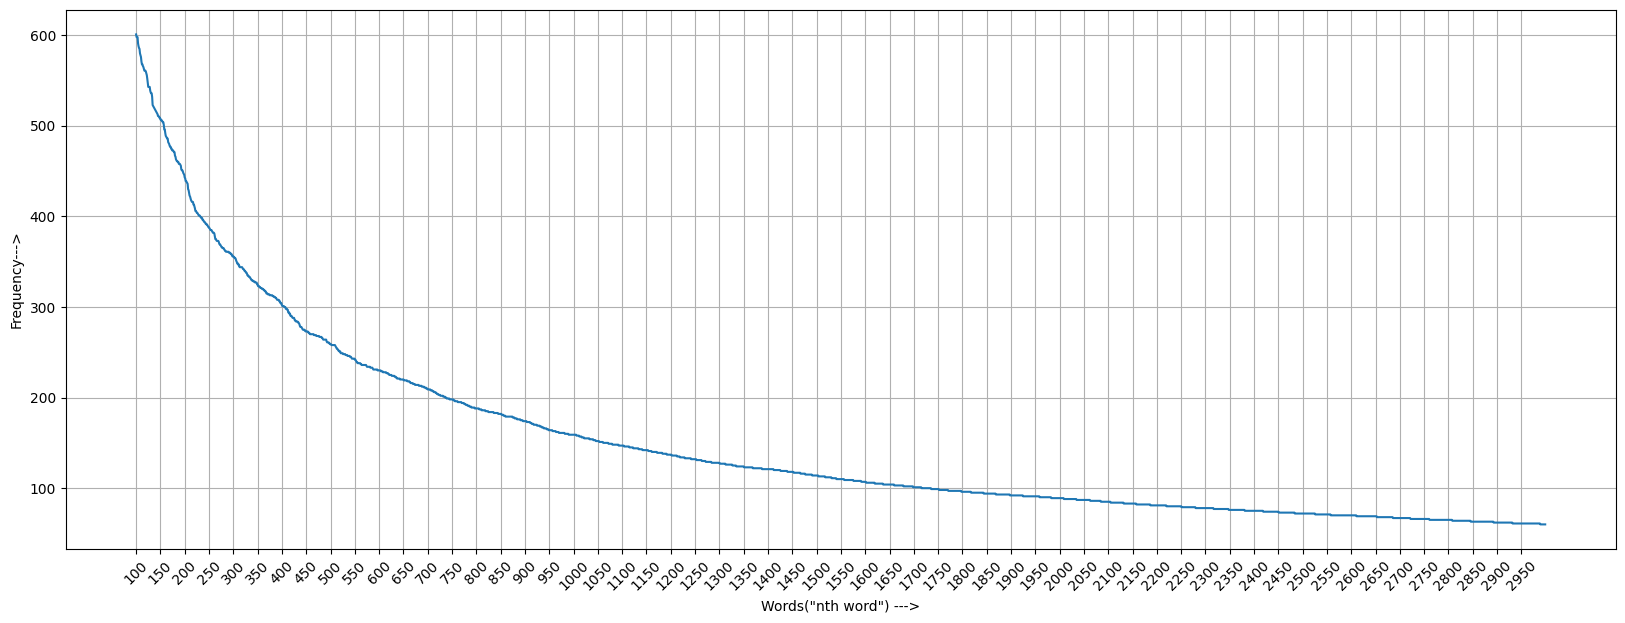

In [12]:
# This cell draws a frequency distribution graph for us to from where we can carefully observe the frequency trend of list
import matplotlib.pyplot as plt
#Limits of graph
lower_limit = 100     #default
upper_limit = 3000  #default
difference_between_each_xtick = 50 # default value, change these values to observe the graph in more depth
#Adjusting the size of graph for more clarity
plt.figure(figsize = (20, 7))

#PLOTTING
plt.plot(np.arange(len(freq))[lower_limit:upper_limit], freq[lower_limit:upper_limit])

#LABELLING
plt.xlabel('Words("nth word") --->')
plt.ylabel("Frequency--->")

#Adjusting the Xticks
plt.xticks(np.arange(lower_limit, upper_limit, 50), rotation = 45)
plt.grid()
plt.show()
#Observe the following graph by changing the values of the lower_limit, upper_limit and difference between each xtick

In [13]:
features = words[20:100000]
# features variable containes all the top words which are most frequently used in all our documents
freq[20], freq[10000]
# since there are 11314 documents I don't want the very high frequency words to get into my final features list as they may be present in all documents which will not help me much for classification, so I have chosen the words having high frequenct freq[20] to freq[9999]

(1256, 16)

In [14]:
# This function is backbone of Text Classification
# It takes the parameters X_train or X_test and the list of all features and converts it into TEXT-CLASSIFICATION-FRIENDLY structure, 
# By Text-Classification-Friendly, I mean it converts the data into a 2-D array which conatains the frequency of that feature, 
# in that particular document, where rows are the documents and columns are the features.
def data_modifier(x_data, features):
    modified_data = np.zeros((len(x_data), len(features)))
    # modified_data currently have a ZEROS numpy array whose shape is (len(x_data)), len(features)
    count = 0
    # Ignore this "Count" vairable, I have created it just to keep an eye on the progress of our algorithm
    max_count = len(x_data)
    for i in range(len(x_data)):
        #Looping over each and every row in the X_data
        current_doc = x_data[i]

        # current_doc contains the current document on which we are iterating(As the name suggests obviously)
        d = dict()
        # this dictionary contains the frequency of all the elements in our current_doc/
        for word in current_doc:
            if word in d.keys():
                d[word] += 1
            else:
                d[word] = 1
        # dictionary created
        for j in range(len(features)):
            # now for each feature in features we will insert the value of the dictionary for the corresponding that is, the freaquency of each feature in the current document.
            if features[j] in d.keys():
                modified_data[i][j] = d[features[j]]
            else:
                # If the current data is not in the dictionary, it will remanin 0 int the modified_data 2D matrix
                continue
        count+=1
        print("Progress: ", (count*100)/max_count, "%")
        # This statement just prints the progress of our data_modifier function, finally Ihave returned the modified array.
    return modified_data
# This function takes some time to process because there we have constructed nearly 3000 features and apart from that we have so many documents which contains so many words, so the algorithms has to go through each word in features list for each word in a particular document, and this needs to be done because this is the only way I could think of to create such a modified array from X_data.
                

In [15]:
X_train_modified = data_modifier(X_train, features)

Progress:  0.011785503830288745 %
Progress:  0.02357100766057749 %
Progress:  0.03535651149086624 %
Progress:  0.04714201532115498 %
Progress:  0.05892751915144372 %
Progress:  0.07071302298173247 %
Progress:  0.08249852681202122 %
Progress:  0.09428403064230996 %
Progress:  0.1060695344725987 %
Progress:  0.11785503830288745 %
Progress:  0.1296405421331762 %
Progress:  0.14142604596346495 %
Progress:  0.15321154979375368 %
Progress:  0.16499705362404243 %
Progress:  0.17678255745433116 %
Progress:  0.18856806128461992 %
Progress:  0.20035356511490865 %
Progress:  0.2121390689451974 %
Progress:  0.22392457277548616 %
Progress:  0.2357100766057749 %
Progress:  0.24749558043606365 %
Progress:  0.2592810842663524 %
Progress:  0.27106658809664114 %
Progress:  0.2828520919269299 %
Progress:  0.2946375957572186 %
Progress:  0.30642309958750735 %
Progress:  0.3182086034177961 %
Progress:  0.32999410724808487 %
Progress:  0.3417796110783736 %
Progress:  0.3535651149086623 %
Progress:  0.365350

In [16]:
X_test_modified = data_modifier(X_test, features)

Progress:  0.03534817956875221 %
Progress:  0.07069635913750442 %
Progress:  0.10604453870625663 %
Progress:  0.14139271827500885 %
Progress:  0.17674089784376104 %
Progress:  0.21208907741251326 %
Progress:  0.24743725698126545 %
Progress:  0.2827854365500177 %
Progress:  0.3181336161187699 %
Progress:  0.3534817956875221 %
Progress:  0.38882997525627433 %
Progress:  0.4241781548250265 %
Progress:  0.4595263343937787 %
Progress:  0.4948745139625309 %
Progress:  0.5302226935312832 %
Progress:  0.5655708731000354 %
Progress:  0.6009190526687875 %
Progress:  0.6362672322375398 %
Progress:  0.671615411806292 %
Progress:  0.7069635913750442 %
Progress:  0.7423117709437964 %
Progress:  0.7776599505125487 %
Progress:  0.8130081300813008 %
Progress:  0.848356309650053 %
Progress:  0.8837044892188052 %
Progress:  0.9190526687875574 %
Progress:  0.9544008483563097 %
Progress:  0.9897490279250618 %
Progress:  1.025097207493814 %
Progress:  1.0604453870625663 %
Progress:  1.0957935666313185 %
Pro

## Trying out the inbulit Multinomial Naive Bayes classifier

In [17]:
# First trying out the inbuilt Multinomial naive bayes classifier
clf  = MultinomialNB()
clf.fit(X_train_modified, Y_train)
clf.score(X_test_modified, Y_test)
# It seems like a decent score to me because we haven't used real text classification algorithms like NLP and all. If you want the best possible accuracy, increase the number of features in the 13th cell to around 50,000, you will get nearly 90 percent of accuracy, but I do not recommend it as the 49999th element will have the frequency of just 2 and such a feature won't help us much for the classification.

0.8918345705196182

### Writing our own naive bayes classifier

In [22]:
#fit function takes the training data and gives you a dictionary whose keys are the different classes available to classify.
# and for each key, value is another dictionary, whose keys are all the features available to us and value corresponding
# to each key is sum of all the row of training data corresponding to the current class.(the original key or (say) primary key)
def fit(x_train, y_train):
    count=dict()
    for i in range(20):
        needed_docs=x_train[y_train==i]
        #these are all the documents we need to work upon corresponding to the class i.
        count[i]=dict()
        #count is a dictionary whose each key is yet another dictionary.
        count[i]['total']=0
        #it will maintain the total number of words in class i.
        for j in range(len(features)):
            count[i][features[j]]=needed_docs[:, j].sum()
            #it gives me-"how many times jth feature is coming corresponding to class i"
            count[i]['total']+=count[i][features[j]]
            #this additional key named "total" stores the sum of all the values of ith key which signifies the total number of
            # words in class i.
    #returning the dictionary at last.
    return count

#this "probability" function is another backbone of our naive bayes classifier.But before this function please ckeck out 
#predict function given below.
#This "Probability" function takes takes the dictionary, which was originally returned by fit function, the current data point and the current class as its params.
def probability(dictionary, x, current_class):
    probas_for_each_word=[]
    #my plan, here, is to store all the probabilities for each word in features which is available in the current document
    # and then return the logarithmic sum of all these probabilities for that perticular document.
    for i in range(len(x)):
        #iterating through each feature.
        if x[i]!=0:
            #I am skipping those features whose value corresponding to the current document is 0, that is, they are not present
            # in the that document.
            numerator=dictionary[current_class][features[i]]
            #it denotes that how many times that ith feature is occuring in "current_class"
            #this is the numerator of our NON LOGARITHMIC PROBABILITY
            denominator=dictionary[current_class]['total']
            #it denotes that what is the total number of words in the current class.
            #this is the denominator of our NON LOGARITHMIC PROBABILITY
            proba=np.log((numerator+1)/(denominator+len(x)))
            #i have created a variable "proba" which stores the logarithmic probability which also includes the laplace crrection.
            #here "1" with the numerator and len(x) with denominator denotes the laplace correction.
            probas_for_each_word.append(proba)
            #finally i appended "proba" to the probas_for_each_word array.
    #returning the logarithmic sum of all the probabilities. (which can be treated as multiplication of all the probabilities,
    #but multiplying the probabilities simply won't be a good practice as it may nullify the extreamily small probabilities)
    return sum(probas_for_each_word)

#The predict_single function takes a perticular data point "x" from "predict" function and a dictionary which was obtained
#originally from fit function. Before going through this function, you may like to check out the "predict" function.
def predict_single(dic, x):
    classes = dictionary.keys()
    #this variable "classes" maintains all the possible different classes available to us.
    best_p = -1000
    best_class = -1
    #initiated best_p and best_class variables with negative values because we want to consider maximum valued probabilities at
    #the end. In the first run itself they will be replaced by positive values. "best_p" variable denotes the best probability
    #uptill now. and as the name suggests, best_class denotes the best possible class uptill now.
    first_run = True
    #this boolean variable is taken keeping initial negative values in mind
    for current_class in classes:
        #iterating through each and every class in all possible classes.
        p_current_class = probability(dic, x, current_class)
        #p_current_class denotes the probability of current class.
        if (first_run or p_current_class > best_p):
            #if the probability of current class is better than the best probability then i will update the best probability and
            # best_class to probability of current class and the current class respectively.
            best_p = p_current_class
            best_class = current_class
            #updated
        first_run = False
    #returning the best predicted class for the current data point
    return best_class

#The predict function takes testing data and a dictionary as its input, where the dictionary is the one returned from fit function.
def predict(x_test, dic):
    y_pred=[]
    #y_pred maintains all the predicted classes for provided testing data(In modified format---> see the "data_modifier" function).
    for doc in x_test:
        #iterating each document in testing data.
        y_pred.append(predict_single(dic, doc))
        #for each testing data point, we will append the value of predicted class to y_pred. and we will get that value from
        #predict_single function
    #returning the predicted data finally
    return y_pred 

In [23]:
dictionary = fit(X_train_modified, Y_train)
# calling fit function for modified data.

In [24]:
y_predicted  = predict(X_test_modified, dictionary)
# storing the predicted values

In [25]:
from sklearn.metrics import confusion_matrix
# printing the confusion matrix for out own naive bayes classifier
# here i am manually printing the confusion matrix for more clear view
for i in confusion_matrix(y_true=Y_test, y_pred=y_predicted):
    for j in i:
        print(j, end = "   ")
    print()

103   0   0   0   0   0   0   0   0   0   0   0   0   0   0   5   0   3   0   3   
0   127   1   5   1   9   1   0   0   0   0   4   0   1   2   1   0   0   0   0   
0   3   97   9   1   26   1   0   0   0   0   2   0   0   0   0   0   0   0   0   
0   3   2   125   6   5   3   0   0   0   0   4   2   0   0   1   0   1   0   0   
0   1   0   2   124   1   4   1   0   0   0   3   0   1   0   0   0   0   1   0   
0   3   0   0   2   145   0   0   1   0   0   0   0   1   0   0   0   0   1   0   
0   4   0   7   4   2   94   3   2   2   3   6   9   1   1   1   2   1   5   0   
0   0   0   1   0   0   4   120   1   1   1   0   3   0   2   1   1   0   2   0   
0   0   0   0   0   0   2   0   125   0   0   0   0   0   0   0   4   0   0   0   
0   1   0   0   0   0   0   0   0   128   2   0   0   1   0   1   1   0   1   0   
0   0   0   0   0   0   0   1   0   0   133   0   0   0   1   0   0   1   0   0   
0   0   0   0   0   1   0   0   0   0   0   144   0   0   0   0   0   0   0   0   
0   3

In [26]:
from sklearn.metrics import classification_report
#printing the classification report for our own naive bayes classifier.
print(classification_report(y_true=Y_test, y_pred=y_predicted))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       114
           1       0.85      0.84      0.84       152
           2       0.97      0.70      0.81       139
           3       0.79      0.82      0.81       152
           4       0.88      0.90      0.89       138
           5       0.75      0.95      0.84       153
           6       0.85      0.64      0.73       147
           7       0.94      0.88      0.91       137
           8       0.97      0.95      0.96       131
           9       0.96      0.95      0.96       135
          10       0.95      0.98      0.96       136
          11       0.85      0.99      0.91       145
          12       0.90      0.82      0.85       157
          13       0.97      0.96      0.96       151
          14       0.92      0.97      0.94       155
          15       0.83      0.96      0.89       159
          16       0.87      0.98      0.92       140
          17       0.91    

## Observations

##### It seems like recall of some of the classes is excellent while for other is moderate this is prolly because of selction of the features. It depends on how accurately we select features, moew will be the _f1-score_, _precision_ and _recall_ values, although from the confusion matrix we can determine that our algo is not that bad, Infact it was working very precisiely for some classes. And an accuracy _86%_ is not bad. The accuracy is coming out to be equal to the one we got from the inbuilt multinomial naive bayes algorithm, and a better accuracy could be obtained by working on the selection of featuresm the accuracy can be increased upto 90% max by increasing the number of features in 13th cell to 50,000 but it will not be worth it because as we keep on increaseing the number of features the "increase in accuracy" will keep on decreasing. So, it would be more computationally viable to take upto just 10k to 20k features in our vocabulary for such a dataset.
